In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import tensorflow as tf

## Storing all images as numpy array and the corresponding labels

In [36]:
# getting the path of directory which contains images
data_dir_windows=pathlib.Path('C:/Users/Gouri/Desktop/SRIP/Images/animals/animals')
data_dir='Images/animals/animals'

In [37]:
#Getting folders list
folders=os.listdir(data_dir)

In [38]:
#list of paths of files for each folder
files_dict={}
labels_dict={} # {'category':index} dictionary
idx=0
for folder in folders:
    files_dict[folder]=list(data_dir_windows.glob(folder+'/*'))
    labels_dict[folder]=idx
    idx+=1

In [28]:
#labels_dict

In [39]:
#Storing images array in X and corresponding labels in y
X,y=[],[]


for folder,images in files_dict.items():
#     print(folder)
#     print(len(images))
    for image in images:
        img=cv2.imread(str(image))
        img=cv2.resize(img,(150,150))
        X.append(img)
        y.append(labels_dict[folder])
        
    

In [40]:
y=np.array(y)
X=np.array(X)
X=X/255.

## Splitting dataset for one vs rest:  Category Pandas i.e 59th category as one category and left categories as rest category

In [41]:
X_cat=X[y==59]
X_non_cat=X[y!=59]
y_cat=y[y==59]
y_non_cat=y[y!=59]   

In [42]:
total_non_cat_images=X_non_cat.shape[0]

In [43]:
#This helps in picking 120 images randomly from the other categories to make a good balanced dataset of 60 vs 120 images
random_indices=np.random.randint(0,total_non_cat_images,size=(120))

In [44]:
X_sample_non_cat=X_non_cat[random_indices]
y_sample_non_cat=y_non_cat[random_indices]

In [45]:
X_combined_sample = np.concatenate((X_cat, X_sample_non_cat))
y_combined_sample=np.concatenate((y_cat,y_sample_non_cat))

In [46]:
y_combined_sample[y_combined_sample!=59]=1
y_combined_sample[y_combined_sample==59]=0
y_combined_sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [47]:
print(X_combined_sample.shape)
print(y_combined_sample.shape)

(180, 150, 150, 3)
(180,)


In [48]:
y_combined_sample_hc=tf.keras.utils.to_categorical(y_combined_sample, num_classes=2)

## Normal Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_combined_sample,y_combined_sample,test_size=0.3,stratify=y_combined_sample)


In [50]:
y_train_hc = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_hc = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [52]:
model=Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               21233920  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [53]:
def create_model():
    model=Sequential()


    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D((2,2)))


    model.add(Flatten())

    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2,activation='softmax'))
    return model

In [54]:
total_batches=X_train.shape[0]//10
total_batches

12

In [55]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=15,mode="max")

In [56]:
X_train=np.array(X_train)

In [57]:
history=model.fit(x=X_train,y=y_train_hc,epochs=50,validation_data=(X_test,y_test_hc),steps_per_epoch=total_batches//2,callbacks=[callback],batch_size=10)

Epoch 1/50
6/6 [==============================] - 9s 2s/step - loss: 2.7238 - accuracy: 0.6167 - val_loss: 1.5625 - val_accuracy: 0.6667
Epoch 2/50
6/6 [==============================] - 9s 2s/step - loss: 1.1917 - accuracy: 0.6167 - val_loss: 0.6361 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - 2s 384ms/step - loss: 0.6621 - accuracy: 0.6964 - val_loss: 0.6375 - val_accuracy: 0.7037
Epoch 4/50
6/6 [==============================] - 2s 438ms/step - loss: 0.5609 - accuracy: 0.7333 - val_loss: 0.5618 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 5s 869ms/step - loss: 0.4848 - accuracy: 0.7857 - val_loss: 0.4354 - val_accuracy: 0.7778
Epoch 6/50
6/6 [==============================] - 6s 1s/step - loss: 0.3806 - accuracy: 0.8333 - val_loss: 0.3357 - val_accuracy: 0.8704
Epoch 7/50
6/6 [==============================] - 7s 1s/step - loss: 0.2811 - accuracy: 0.8750 - val_loss: 0.8033 - val_accuracy: 0.6852
Epoch 8/50
6/6 [================

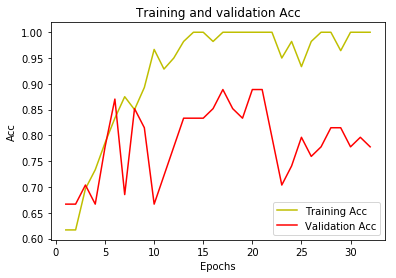

In [58]:
#plot the training and validation accuracy and loss at each epoch history was empty so return model as something and then access something.history there
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [59]:
predictions=model.predict(X_test)
y_pred=np.argmax(predictions,axis=1)

In [60]:
#Count of 0s and 1s
np.unique(y_pred,return_counts=True)

(array([0, 1], dtype=int64), array([10, 44], dtype=int64))

## Evaluation on classification metrics

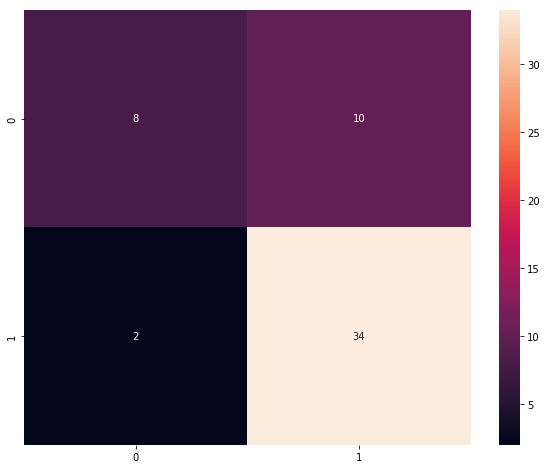

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
cf=confusion_matrix(y_test,y_pred)
cf
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cf,annot=True)

In [62]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.44      0.57        18
          1       0.77      0.94      0.85        36

avg / total       0.78      0.78      0.76        54



## 3 Fold Cross Validation

In [63]:
from tensorflow import keras

In [64]:
callback = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy',patience=8,mode="max")

In [65]:
from sklearn.model_selection import KFold
import numpy as np
history_rec={}
for kfold, (train, test) in enumerate(KFold(n_splits=3, 
                                shuffle=True).split(X_combined_sample, y_combined_sample_hc)):
    # clear the session 
    tf.keras.backend.clear_session()
    # calling the model and compile it 
    seq_model = create_model()
    seq_model.compile(
        loss  = tf.keras.losses.CategoricalCrossentropy(),
        metrics  = tf.keras.metrics.CategoricalAccuracy(),
        optimizer = tf.keras.optimizers.Adam())
    print('Train Set')
    print(X_combined_sample[train].shape)
    print(y_combined_sample_hc[train].shape)
    print('Test Set')
    print(X_combined_sample[test].shape)
    print(y_combined_sample_hc[test].shape)
    # run the model 
    history=seq_model.fit(X_combined_sample[train], y_combined_sample_hc[train],
              batch_size=10, epochs=50, validation_data=(X_combined_sample[test], y_combined_sample_hc[test]),steps_per_epoch=4,callbacks=[callback])
    history_rec[kfold]=history.history
    
    seq_model.save(f'ovr_{kfold}.keras')

Train Set
(120, 150, 150, 3)
(120, 2)
Test Set
(60, 150, 150, 3)
(60, 2)
Epoch 1/50
4/4 [==============================] - 5s 2s/step - loss: 3.0697 - categorical_accuracy: 0.6000 - val_loss: 1.2899 - val_categorical_accuracy: 0.6167
Epoch 2/50
4/4 [==============================] - 2s 465ms/step - loss: 1.3176 - categorical_accuracy: 0.6750 - val_loss: 0.8051 - val_categorical_accuracy: 0.6167
Epoch 3/50
4/4 [==============================] - 2s 506ms/step - loss: 0.6513 - categorical_accuracy: 0.6500 - val_loss: 0.6694 - val_categorical_accuracy: 0.6167
Epoch 4/50
4/4 [==============================] - 4s 1s/step - loss: 0.6529 - categorical_accuracy: 0.7250 - val_loss: 0.6630 - val_categorical_accuracy: 0.7167
Epoch 5/50
4/4 [==============================] - 2s 469ms/step - loss: 0.5597 - categorical_accuracy: 0.8000 - val_loss: 0.6481 - val_categorical_accuracy: 0.6167
Epoch 6/50
4/4 [==============================] - 2s 506ms/step - loss: 0.5544 - categorical_accuracy: 0.7250 - v

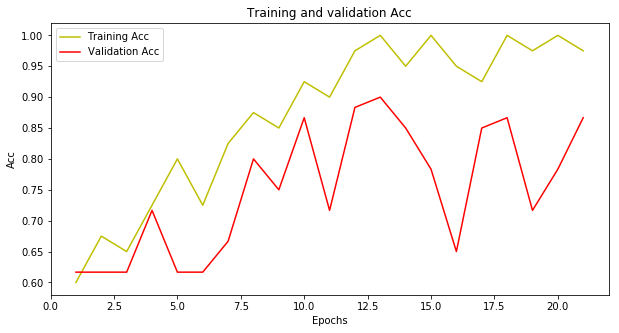

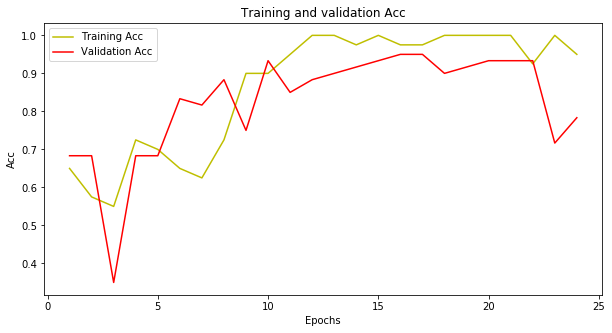

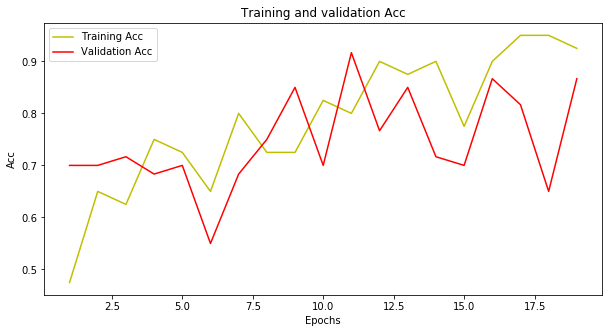

In [66]:
#plot the training and validation accuracy and loss at each epoch history was empty so return model as something and then access something.history there
for key,rec in history_rec.items():
    acc = rec['categorical_accuracy']
    val_acc = rec['val_categorical_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, acc, 'y', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title('Training and validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

For model 0
             precision    recall  f1-score   support

          0       1.00      0.78      0.88        18
          1       0.90      1.00      0.95        36

avg / total       0.93      0.93      0.92        54

For model 1
             precision    recall  f1-score   support

          0       1.00      0.67      0.80        18
          1       0.86      1.00      0.92        36

avg / total       0.90      0.89      0.88        54

For model 2
             precision    recall  f1-score   support

          0       1.00      0.89      0.94        18
          1       0.95      1.00      0.97        36

avg / total       0.96      0.96      0.96        54



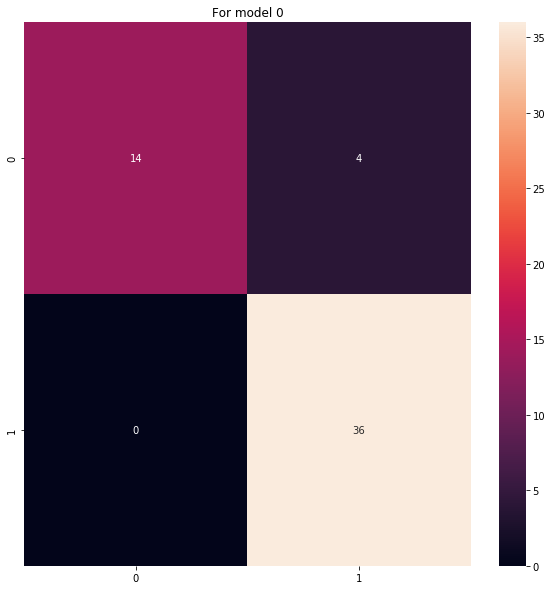

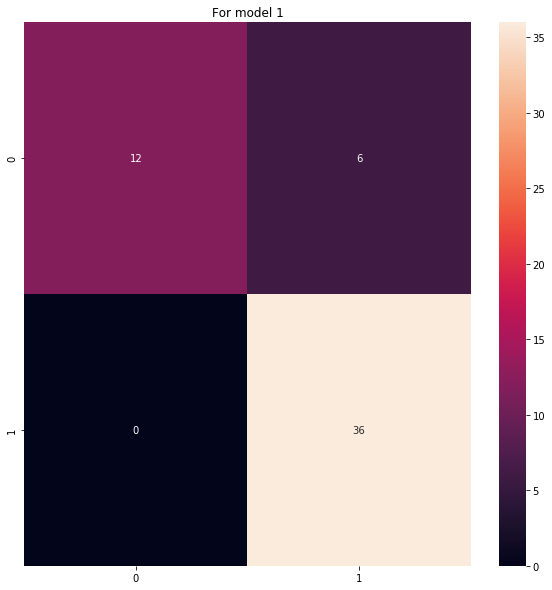

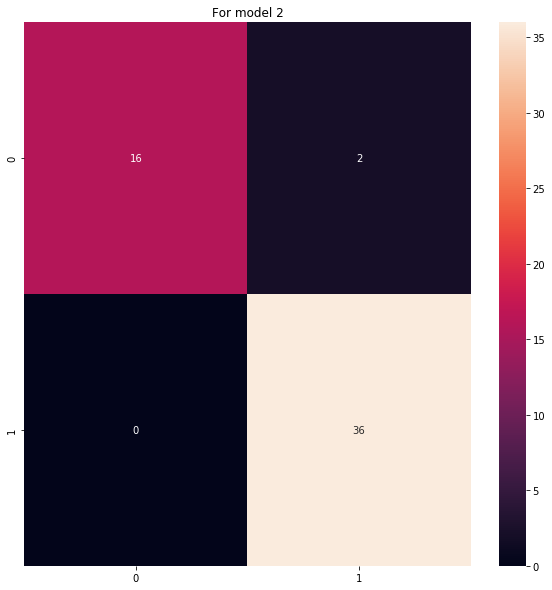

In [68]:
for idx in range(3):
    tf.keras.backend.clear_session()
    model=keras.models.load_model(f'ovr_{idx}.keras')
    pred=model.predict(X_test)
    y_pred=np.argmax(pred,axis=1)
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.title(f'For model {idx}')
    print(f'For model {idx}')
    print(classification_report(y_test,y_pred))